1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [2]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

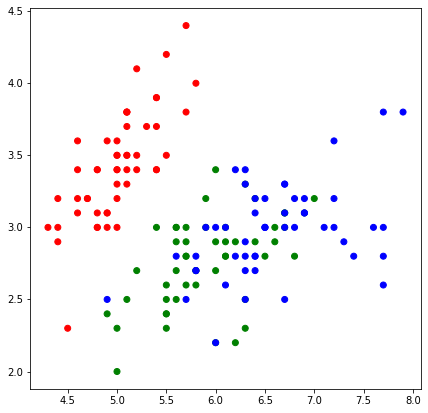

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [6]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [7]:
def knn(x_train, y_train, x_test, k, w_case=0):
    
    q = 0.9  # для весов
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for i, d in enumerate(k_neighbours):
            w = 1
            if w_case == 1:
                w = pow(q, i)
            elif w_case == 2:
                w = pow(q, d[0])
            
            classes[d[1]] += w # вес каждого соседа равен 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
k = range(1, 11)
accr_0, accr_1, accr_2 = [], [], []

for i in k:
    y_pred_0 = knn(X_train, y_train, X_test, i)
    y_pred_1 = knn(X_train, y_train, X_test, i, 1)
    y_pred_2 = knn(X_train, y_train, X_test, i, 2)
    
    accr_0.append(accuracy(y_pred_0, y_test))
    accr_1.append(accuracy(y_pred_1, y_test))
    accr_2.append(accuracy(y_pred_2, y_test))

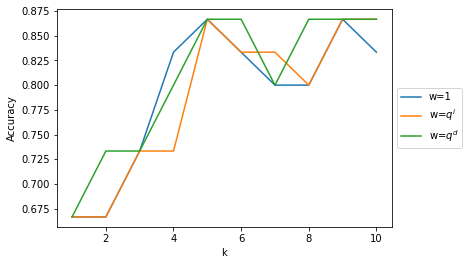

In [10]:
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k, accr_0, label='w=1')
plt.plot(k, accr_1, label=r'w=$q^i$')
plt.plot(k, accr_2, label=r'w=$q^d$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Вывод:** второй вариант выбора весов - $q^d$ - показал лучший и более устойчивый результат